In [2]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the datasets
path = "C:/Users/user/Downloads/VaccinePrediction"
train = pd.read_csv(path +"/training_set_features.csv")
test = pd.read_csv(path +"/test_set_features.csv")
label = pd.read_csv(path +"/training_set_labels.csv") 

In [4]:
#shape of the datasets
print(train.shape, test.shape, label.shape)

(26707, 36) (26708, 36) (26707, 3)


In [5]:
# data cleaning
train.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [6]:
#first 5 rows
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


DATA CLEANING & PREPROCESSING

In [7]:
#dropping columns with less information
columns_to_drop = ["employment_industry","employment_occupation","hhs_geo_region"]

for df in [train,test]:
     df = df.drop(columns =columns_to_drop, inplace=True)

In [8]:
# since this is a model building data, I will concat both my data to have one dataset that I will perform EDA.
# Using axis= 0, since I am stacking the data row-wise.

data = pd.concat([train, test], axis=0) 

In [9]:
# 53,415 = (26707 + 26708), shapes of train and test
data.shape

(53415, 33)

In [10]:
# filling numerical columns with mean

num_columns = data.select_dtypes(include = [np.number])

for col in num_columns:
     data[col] = data[col].fillna(data[col].mean())

In [11]:
data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [12]:
# filling null values of categorical columns with mode, the first mode that appears first hence mode()[0]
cat_columns = data.select_dtypes(exclude = [np.number])

for col in cat_columns:
     data[col] = data[col].fillna(data[col].mode()[0])

CLEANING THE AGE GROUP COLUMN

In [13]:
# replacing Years with space, and 65+ with a range 65-100 
data["age_group"] = data["age_group"].str.replace("Years", "")

In [14]:
#replacing 65+ with a range of 65-100
data["age_group"] = data["age_group"].replace(to_replace="65+",value = "65-100")

In [15]:
# checking if my column has been cleaned and updated
age_group_column = data['age_group']
print(age_group_column.head())

0    55 - 64 
1    35 - 44 
2    18 - 34 
3        65+ 
4    45 - 54 
Name: age_group, dtype: object


CLEANING THE EDUCATION COLUMN

In [16]:
#Replacing the > 12 years and 12 years with college and high school respectively
data["education"] = data["education"].str.replace("< 12 Years", "College") 
data["education"] = data["education"].str.replace("12 Years", "High School")

In [17]:
#achieved what I wanted 
education_column = data["education"]
print(education_column.head(2))

0        College
1    High School
Name: education, dtype: object


CLEANING THE INCOME POVERTY COLUMN

In [24]:
data["income_poverty"] = data["income_poverty"].str.replace("Below Poverty", "Lower Class")

In [28]:
data["income_poverty"] = data["income_poverty"].str.replace("<= $75,000, Above Poverty", "Middle Class", regex=False) 

In [29]:
data["income_poverty"] = data["income_poverty"].str.replace("> $75,000", "Upper Class", regex=False)

In [30]:
income_column = data["income_poverty"]
print(income_column.head(2))

0    Lower Class
1    Lower Class
Name: income_poverty, dtype: object


h1n1_concern - Level of concern about the H1N1 flu.
0 = Not at all concerned; 
1 = Not very concerned; 
2 = Somewhat concerned; 
3 = Very concerned.

h1n1_knowledge - Level of knowledge about H1N1 flu.
0 = No knowledge; 
1 = A little knowledge; 
2 = A lot of knowledge.

H1N1 CONCERN ANALYSIS AND VISUALIZATION

Text(0.5, 0, 'Gender')

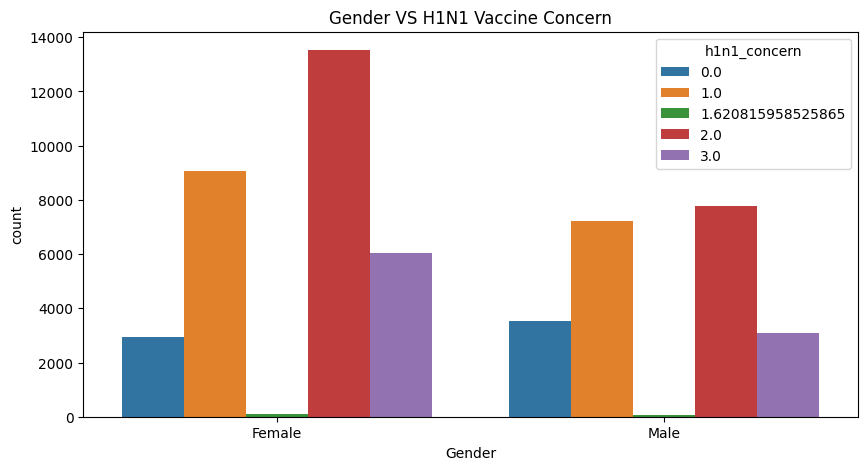

In [31]:
# which gender is most concerned about H1N1 Vaccine 
plt.figure(figsize=(10, 5))
sns.countplot(x="sex", data=data, hue="h1n1_concern")
plt.title("Gender VS H1N1 Vaccine Concern")
plt.xlabel("Gender")

Females are somewhat concern about the H1N1 vaccine compared to men who are abit less concerned, most men are totally not concerned

Text(0.5, 0, 'Education')

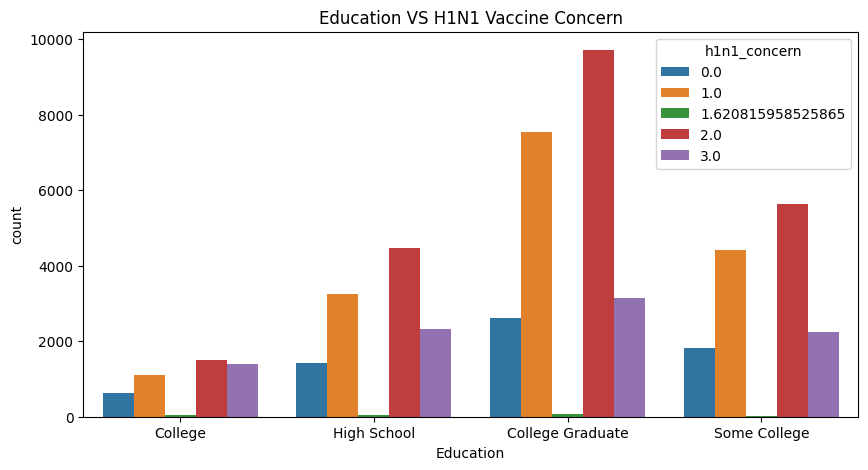

In [32]:
# which education level of people is most concerned about H1N1 Vaccine 
plt.figure(figsize=(10, 5))
sns.countplot(x="education", data=data, hue="h1n1_concern")
plt.title("Education VS H1N1 Vaccine Concern")
plt.xlabel("Education")

Text(0.5, 1.0, 'Income Lvl vs H1N1 vaccine')

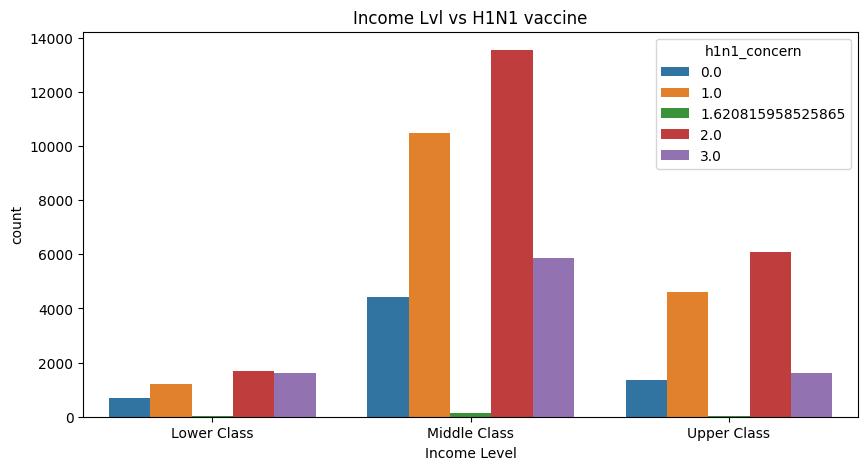

In [33]:
# income level vs H1N1 Vaccine concern
plt.figure(figsize=(10,5))
sns.countplot(x = "income_poverty", hue="h1n1_concern",data = data)
plt.xlabel("Income Level")
plt.title("Income Lvl vs H1N1 vaccine")

Text(0.5, 0, 'Marital Status')

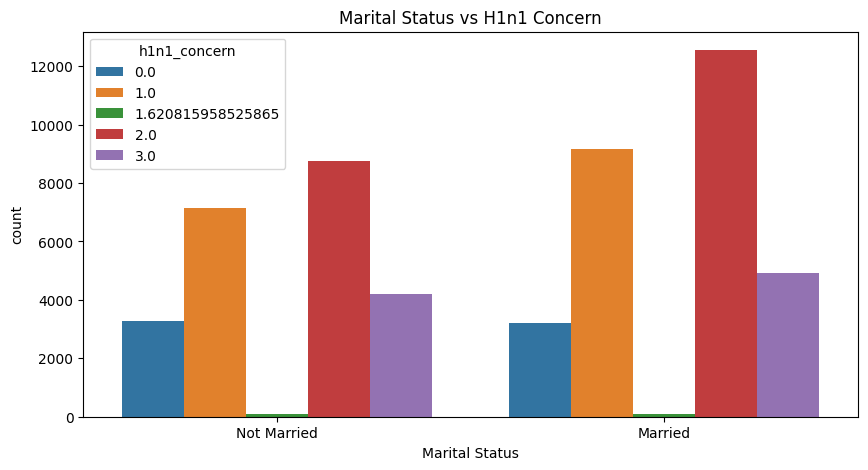

In [34]:
# marital status vs h1n1 vaccine concern
plt.figure(figsize = (10,5))
sns.countplot(x = "marital_status",data = data,hue="h1n1_concern")
plt.title("Marital Status vs H1n1 Concern")
plt.xlabel("Marital Status")

Text(0.5, 0, 'Property ownership')

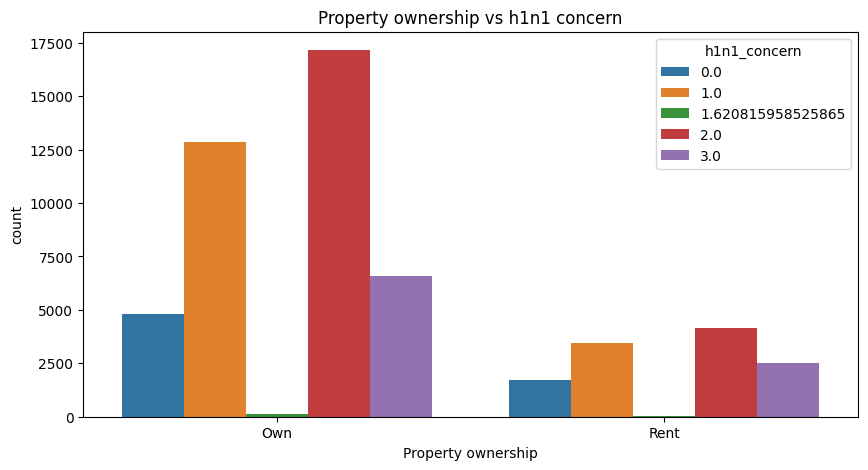

In [35]:
# property ownership analysis
plt.figure(figsize=(10,5))
sns.countplot(x="rent_or_own",data=data,hue="h1n1_concern")
plt.title("Property ownership vs h1n1 concern")
plt.xlabel("Property ownership")

Text(0.5, 0, 'Employment Status')

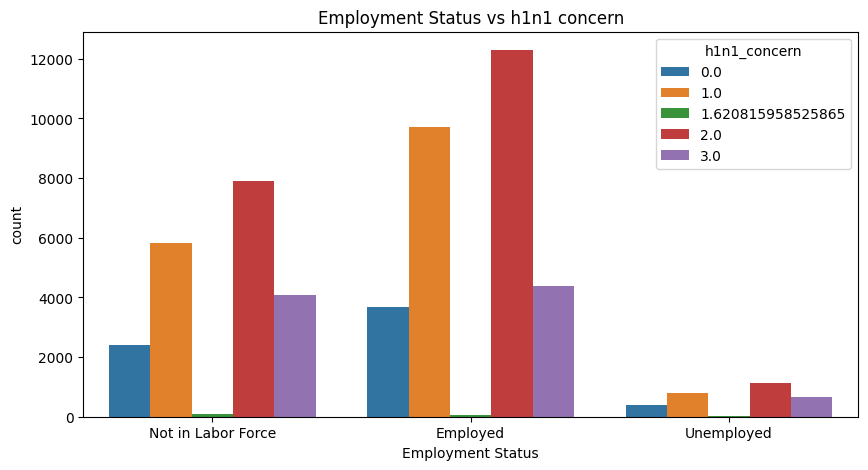

In [36]:
# Employment status analysis
plt.figure(figsize=(10,5))
sns.countplot(x="employment_status",data=data,hue="h1n1_concern")
plt.title("Employment Status vs h1n1 concern")
plt.xlabel("Employment Status")

H1N1 KNOWLEDGE ANALYSIS AND VISUALIZATION

Text(0.5, 0, 'Gender')

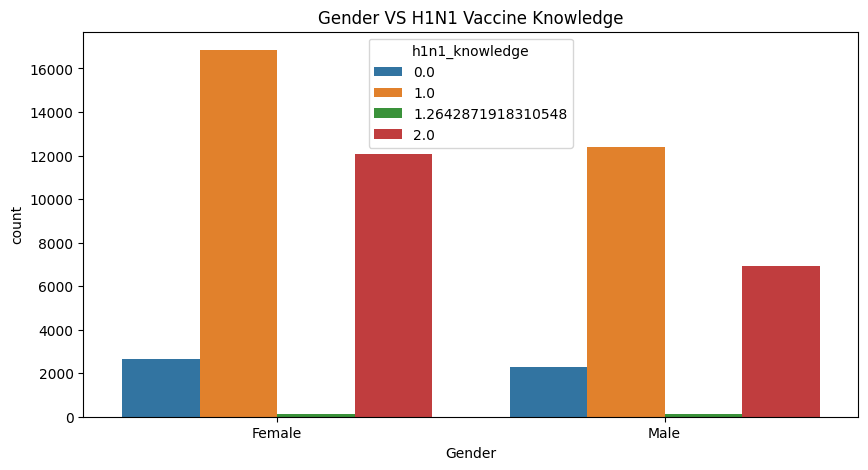

In [38]:
# which gender is most knowledgable about H1N1 Vaccine 
plt.figure(figsize=(10, 5))
sns.countplot(x="sex", data=data, hue="h1n1_knowledge")
plt.title("Gender VS H1N1 Vaccine Knowledge")
plt.xlabel("Gender")

Text(0.5, 0, 'Education')

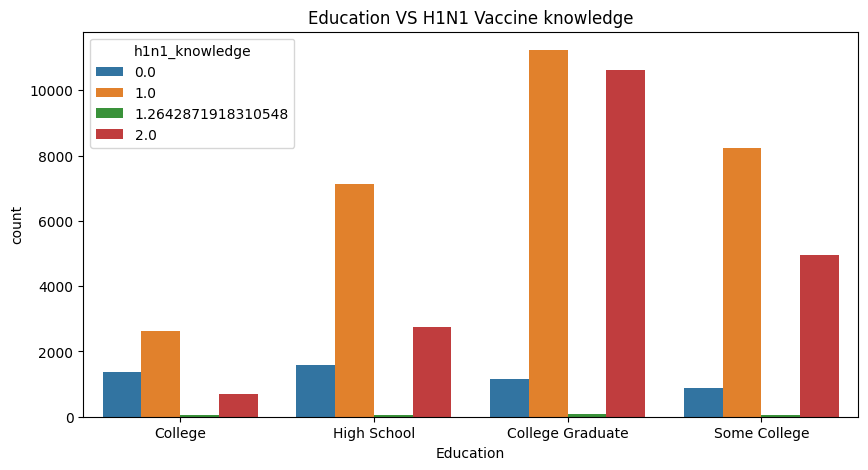

In [39]:
# which education level of people is most concerned about H1N1 Vaccine 
plt.figure(figsize=(10, 5))
sns.countplot(x="education", data=data, hue="h1n1_knowledge")
plt.title("Education VS H1N1 Vaccine knowledge")
plt.xlabel("Education")

Text(0.5, 1.0, 'Income Lvl vs H1N1 vaccine knowledge')

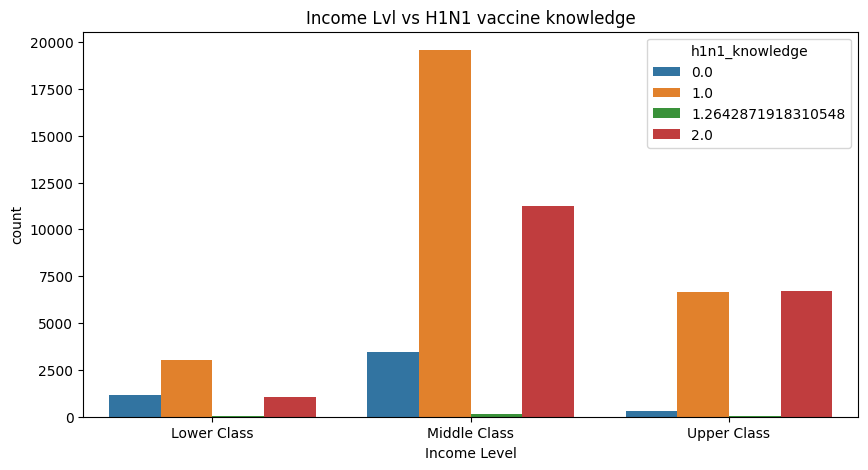

In [41]:
# income level vs H1N1 Vaccine concern
plt.figure(figsize=(10,5))
sns.countplot(x = "income_poverty", hue="h1n1_knowledge",data = data)
plt.xlabel("Income Level")
plt.title("Income Lvl vs H1N1 vaccine knowledge")

Text(0.5, 0, 'Marital Status')

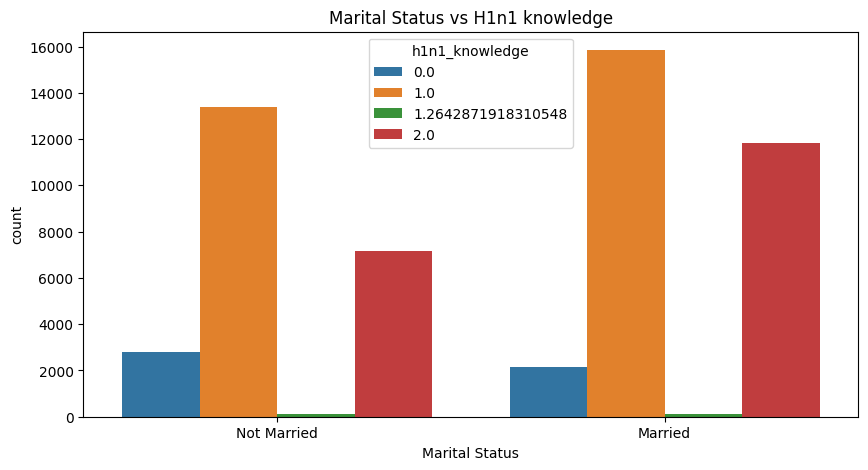

In [42]:
# marital status vs h1n1 vaccine concern
plt.figure(figsize = (10,5))
sns.countplot(x="marital_status",data=data, hue="h1n1_knowledge")
plt.title("Marital Status vs H1n1 knowledge")
plt.xlabel("Marital Status")

Text(0.5, 0, 'Property ownership')

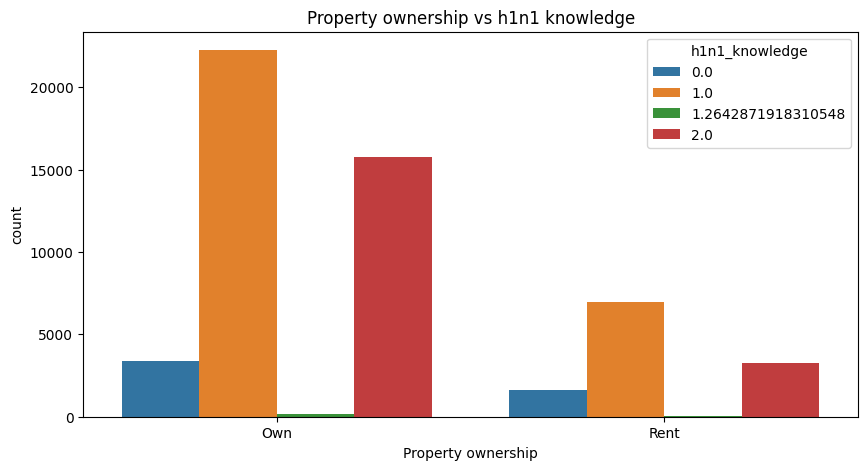

In [43]:
# property ownership analysis
plt.figure(figsize=(10,5))
sns.countplot(x="rent_or_own",data=data, hue="h1n1_knowledge")
plt.title("Property ownership vs h1n1 knowledge")
plt.xlabel("Property ownership")

Text(0.5, 0, 'Employment Status')

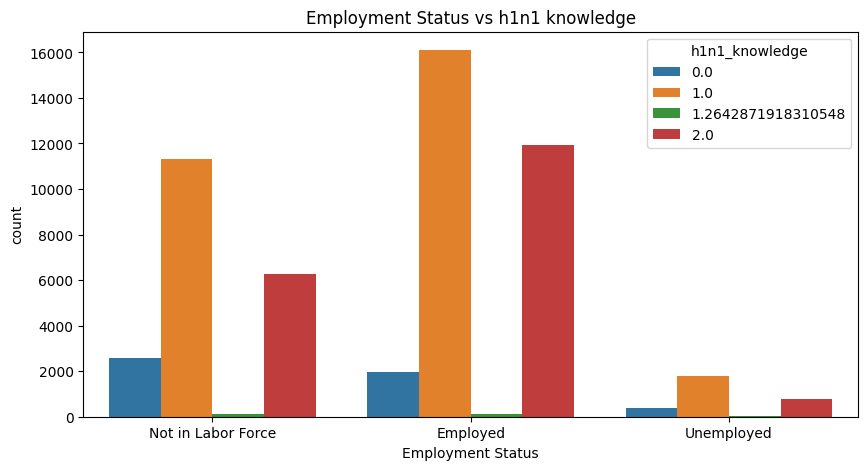

In [44]:
# Employment status analysis
plt.figure(figsize=(10,5))
sns.countplot(x="employment_status",data=data, hue="h1n1_knowledge") 
plt.title("Employment Status vs h1n1 knowledge")
plt.xlabel("Employment Status")

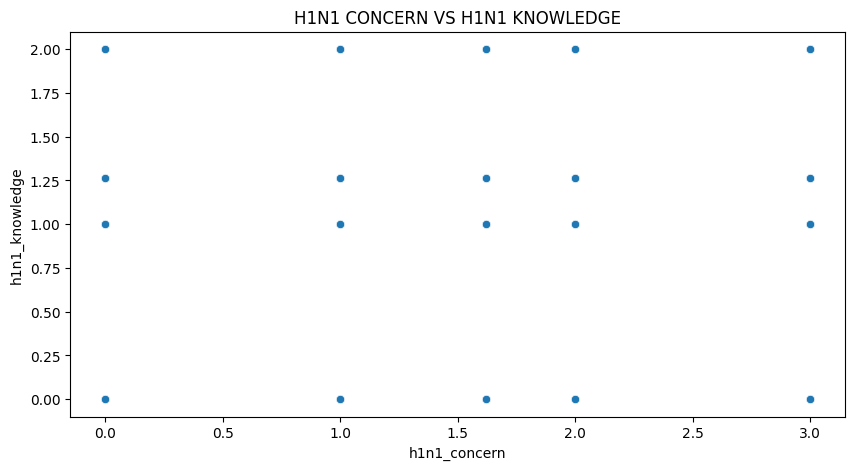

In [45]:
#is there a relationship between h1n1 concern and h1n1 knowledge?
plt.figure(figsize=(10,5))
sns.scatterplot(x="h1n1_concern",y="h1n1_knowledge",data=data)
plt.title("H1N1 CONCERN VS H1N1 KNOWLEDGE")
plt.show()

There is no relationship